# Distribution width and assymetry can be measured by:
1. Variance
2. Standard deviation
3. Skewness
4. Kurtosis

In [1]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sc
import matplotlib.pyplot as plt

# VARIANCE
A measure of how much a distribution spreads out around the mean
Formally - is the expected value of the squared deviation from the mean

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $$

where $\mu$ is the mean of dataset $x$. We calculate the distance from the mean and divide by N or N-1.

In [7]:
df = np.loadtxt('dataset.txt')

# np will automatically use N
print(np.var(df))
# if N-1 use argument delta-degrees of freedom
print(np.var(df, ddof=1))

13.136575622563686
13.137626632694301


# STANDARD DEVIATION
square root of the variance

In [8]:
print(np.std(df), (np.std(df)**2))

3.6244414221454435 13.136575622563685


### GAUSSIAN APPROXIMATION a.k.a (NORMAL APPROXIMATION)
can combine mean and standard deviation

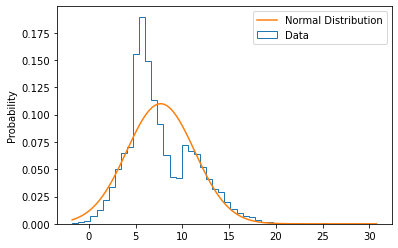

In [26]:
x = np.linspace(df.min(), df.max(), 100)
y = sc.norm.pdf(x, loc=np.mean(df), scale=np.std(df))

plt.hist(df, bins=50, density=True, histtype='step', label='Data')
plt.plot(x, y, label='Normal Distribution')
plt.ylabel('Probability')
plt.legend();

# this plot means that with the mean and std, we can recunstruct the 
# normal approximation of our data thats plotted in hist

# this can also be viewed by
# sns.distplot(df, fit=sc.norm();

# SKEWNESs
Is a measure of symmetry, or the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Skewness alludes the tendency of a distribution that determines its symmetry about the mean.

$$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $$

In a skewed distribution, the curve is extended to either left or right side. So, when the plot is extended towards the right side more, it denotes positive skewness, wherein mode < median < mean. On the other hand, when the plot is stretched more towards the left direction, then it is called as negative skewness and so, mean < median < mode.

#### Measures 
Degree of lopsidedness in the distribution.

#### What is it?
It is an indicator of lack of equivalence in the frequency distribution.

#### Represents
Amount and direction of the skew.

In [27]:
print(sc.skew(df))

0.7408773663373577


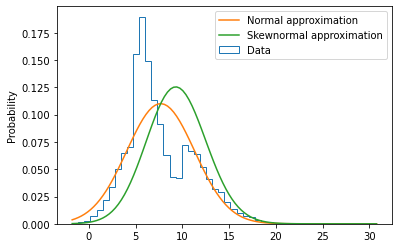

In [28]:
# lets visualize data with skewnormal approximation
x = np.linspace(df.min(), df.max(), 100)
y1 = sc.norm.pdf(x, loc=np.mean(df), scale=np.std(df))
y2 = sc.skewnorm.pdf(x, sc.skew(df), loc=np.mean(df), scale=np.std(df))

plt.hist(df, bins=50, density=True, histtype='step', label='Data')
plt.plot(x, y1, label='Normal approximation')
plt.plot(x, y2, label='Skewnormal approximation')
plt.ylabel('Probability')
plt.legend();

# Skewnormal is in fact a worst approximation

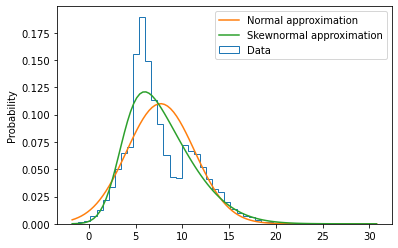

In [29]:
# lets fit data to the skewnormal mean and re-plot
x = np.linspace(df.min(), df.max(), 100)
y1 = sc.norm.pdf(x, loc=np.mean(df), scale=np.std(df))
fitted_skew = sc.skewnorm.fit(df)
y2 = sc.skewnorm.pdf(x, *fitted_skew)

plt.hist(df, bins=50, density=True, histtype='step', label='Data')
plt.plot(x, y1, label='Normal approximation')
plt.plot(x, y2, label='Skewnormal approximation')
plt.ylabel('Probability')
plt.legend();

# now we get a fitted skewnormal to the data

# KURTOSIS
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
That is, data sets with HIGH kurtosis tend to HAVE heavy tails, or OUTLIERS. Data sets with LOW kurtosis tend to have LIGHT tails, or lack of OUTLIERS.

Kurtosis means the measure of the respective sharpness of the curve, in the frequency distribution.

$$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $$

Positive kurtosis represents that the distribution is more peaked than the normal distribution, whereas negative kurtosis shows that the distribution is less peaked than the normal distribution. There are three types of distributions:

* Leptokurtic: Sharply peaked with fat tails, and less variable.
* Mesokurtic: Medium peaked
* Platykurtic: Flattest peak and highly dispersed.

#### Measures
Degree of tailedness in the distribution.

#### What is it?
It is the measure of data, which is either peaked or flat in relation to the normal distribution.

#### Represents
How tall and sharp the central peak is?

In [30]:
print(sc.kurtosis(df))

0.5517538497309498
